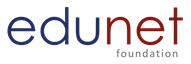

# Edunet Foundation : Class Room Exercises

# Lab 22-Wine Quality Classification by Scikit-Learn




<h2> A little about Red Wine</h2>


Red wine has been part of social, religious, and cultural events for hundreds of years.

Red wine is made by crushing and fermenting dark-colored, whole grapes.

There are many types of red wine, which vary in taste and color. Common varieties include Shiraz, Merlot, Cabernet sauvignon, Pinot noir and Zinfandel.

The alcohol content usually ranges from 12–15%.

We can get the data set from [Kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?select=WineQT.csv).

<h2> Understand about Dataset</h2>

Understanding the different features of wine, we see that there are a total of 12 columns including the final quality parameter. Let us try to find out what these columns mean and how do they contribute in determing the quality of the red wine!

* **Fixed Acidity:** are non-volatile acids that do not evaporate readily

* **Volatile Acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste

* **Citric Acid:** acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

* **Residual Sugar:** is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

* **Chlorides:** the amount of salt in the wine

* **Free Sulfur Dioxide:** it prevents microbial growth and the oxidation of wine

* **Total Sulfur Dioxide:** is the amount of free + bound forms of SO2

* **Density:** sweeter wines have a higher density

* **pH:** describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

* **Alcohol:** available in small quantities in wines makes the drinkers sociable

* **Sulphates:** a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

* **Quality:** which is the output variable/predictor


Now we have a basic knowledge of various factors that influence the quality of good wine, Shall we drink to that? 🥂

## Now let's start with EDA first and then we go with Model prediction.

### Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
wine_df = pd.read_csv('Lab 22 winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
wine_df.sample(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
875,8.8,0.31,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,11.8,7
179,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,5
1147,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7
423,10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,7
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,6
1188,6.7,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5


In [5]:
print(wine_df.columns)
print(wine_df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As of now, we can see thay there are no null values in dataset. 

In [7]:
# statistical info
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**A few observations:**

* The quality of wine varies from 3 to 8, where 6 is the average quality.
* The maximum alcohol level in the wine is 14.9 and minimum is 8.4
* The pH level of wine varies between 2.74 to 4.01.
* The average density of wine is 0.9956.
* Total sulpher dioxide varies between 6.0 to 289.0.

In [8]:
# check for null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

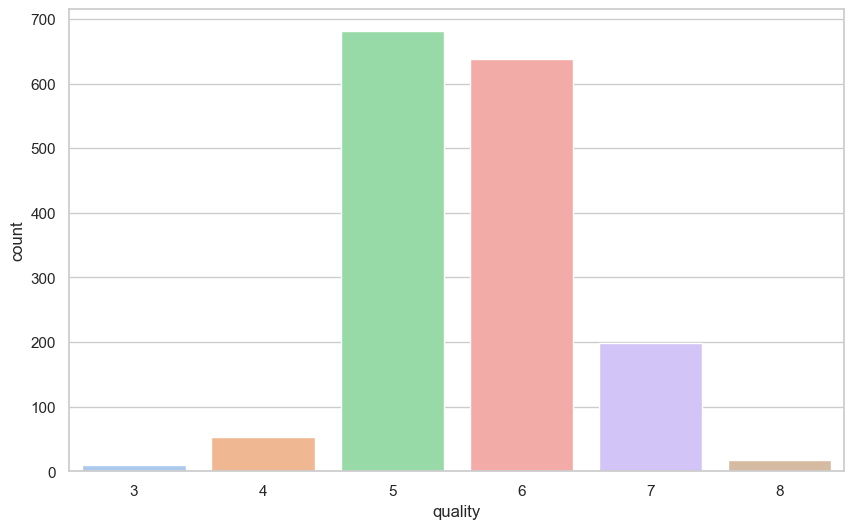

In [9]:
sns.set(style="whitegrid")
print(wine_df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(x='quality',data=wine_df, palette='pastel')

The number of ratings for wine quality '5' and '6' are more than 10 times of that of '3' , '4' and '8'. If we leave it as it is, it might create some problem  for us in predicting the quality of the wine. Alternatively, we can also undersample the category '5' and '6' and oversample the remaining ones.

Anyway, we'll decide it later.

<Axes: >

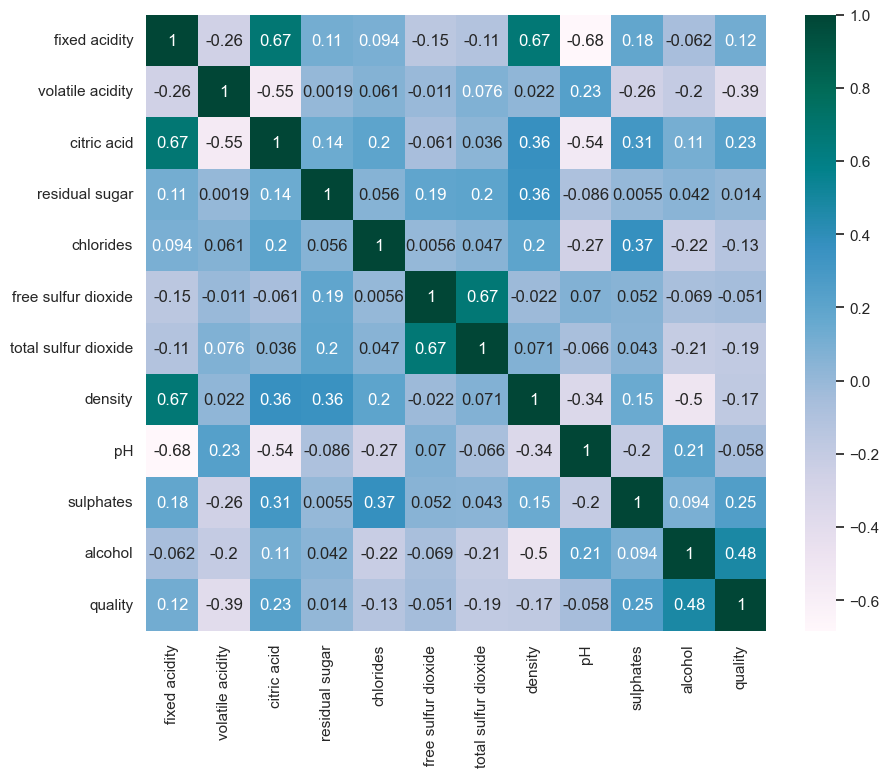

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(wine_df.corr(),annot=True, cmap= 'PuBuGn')

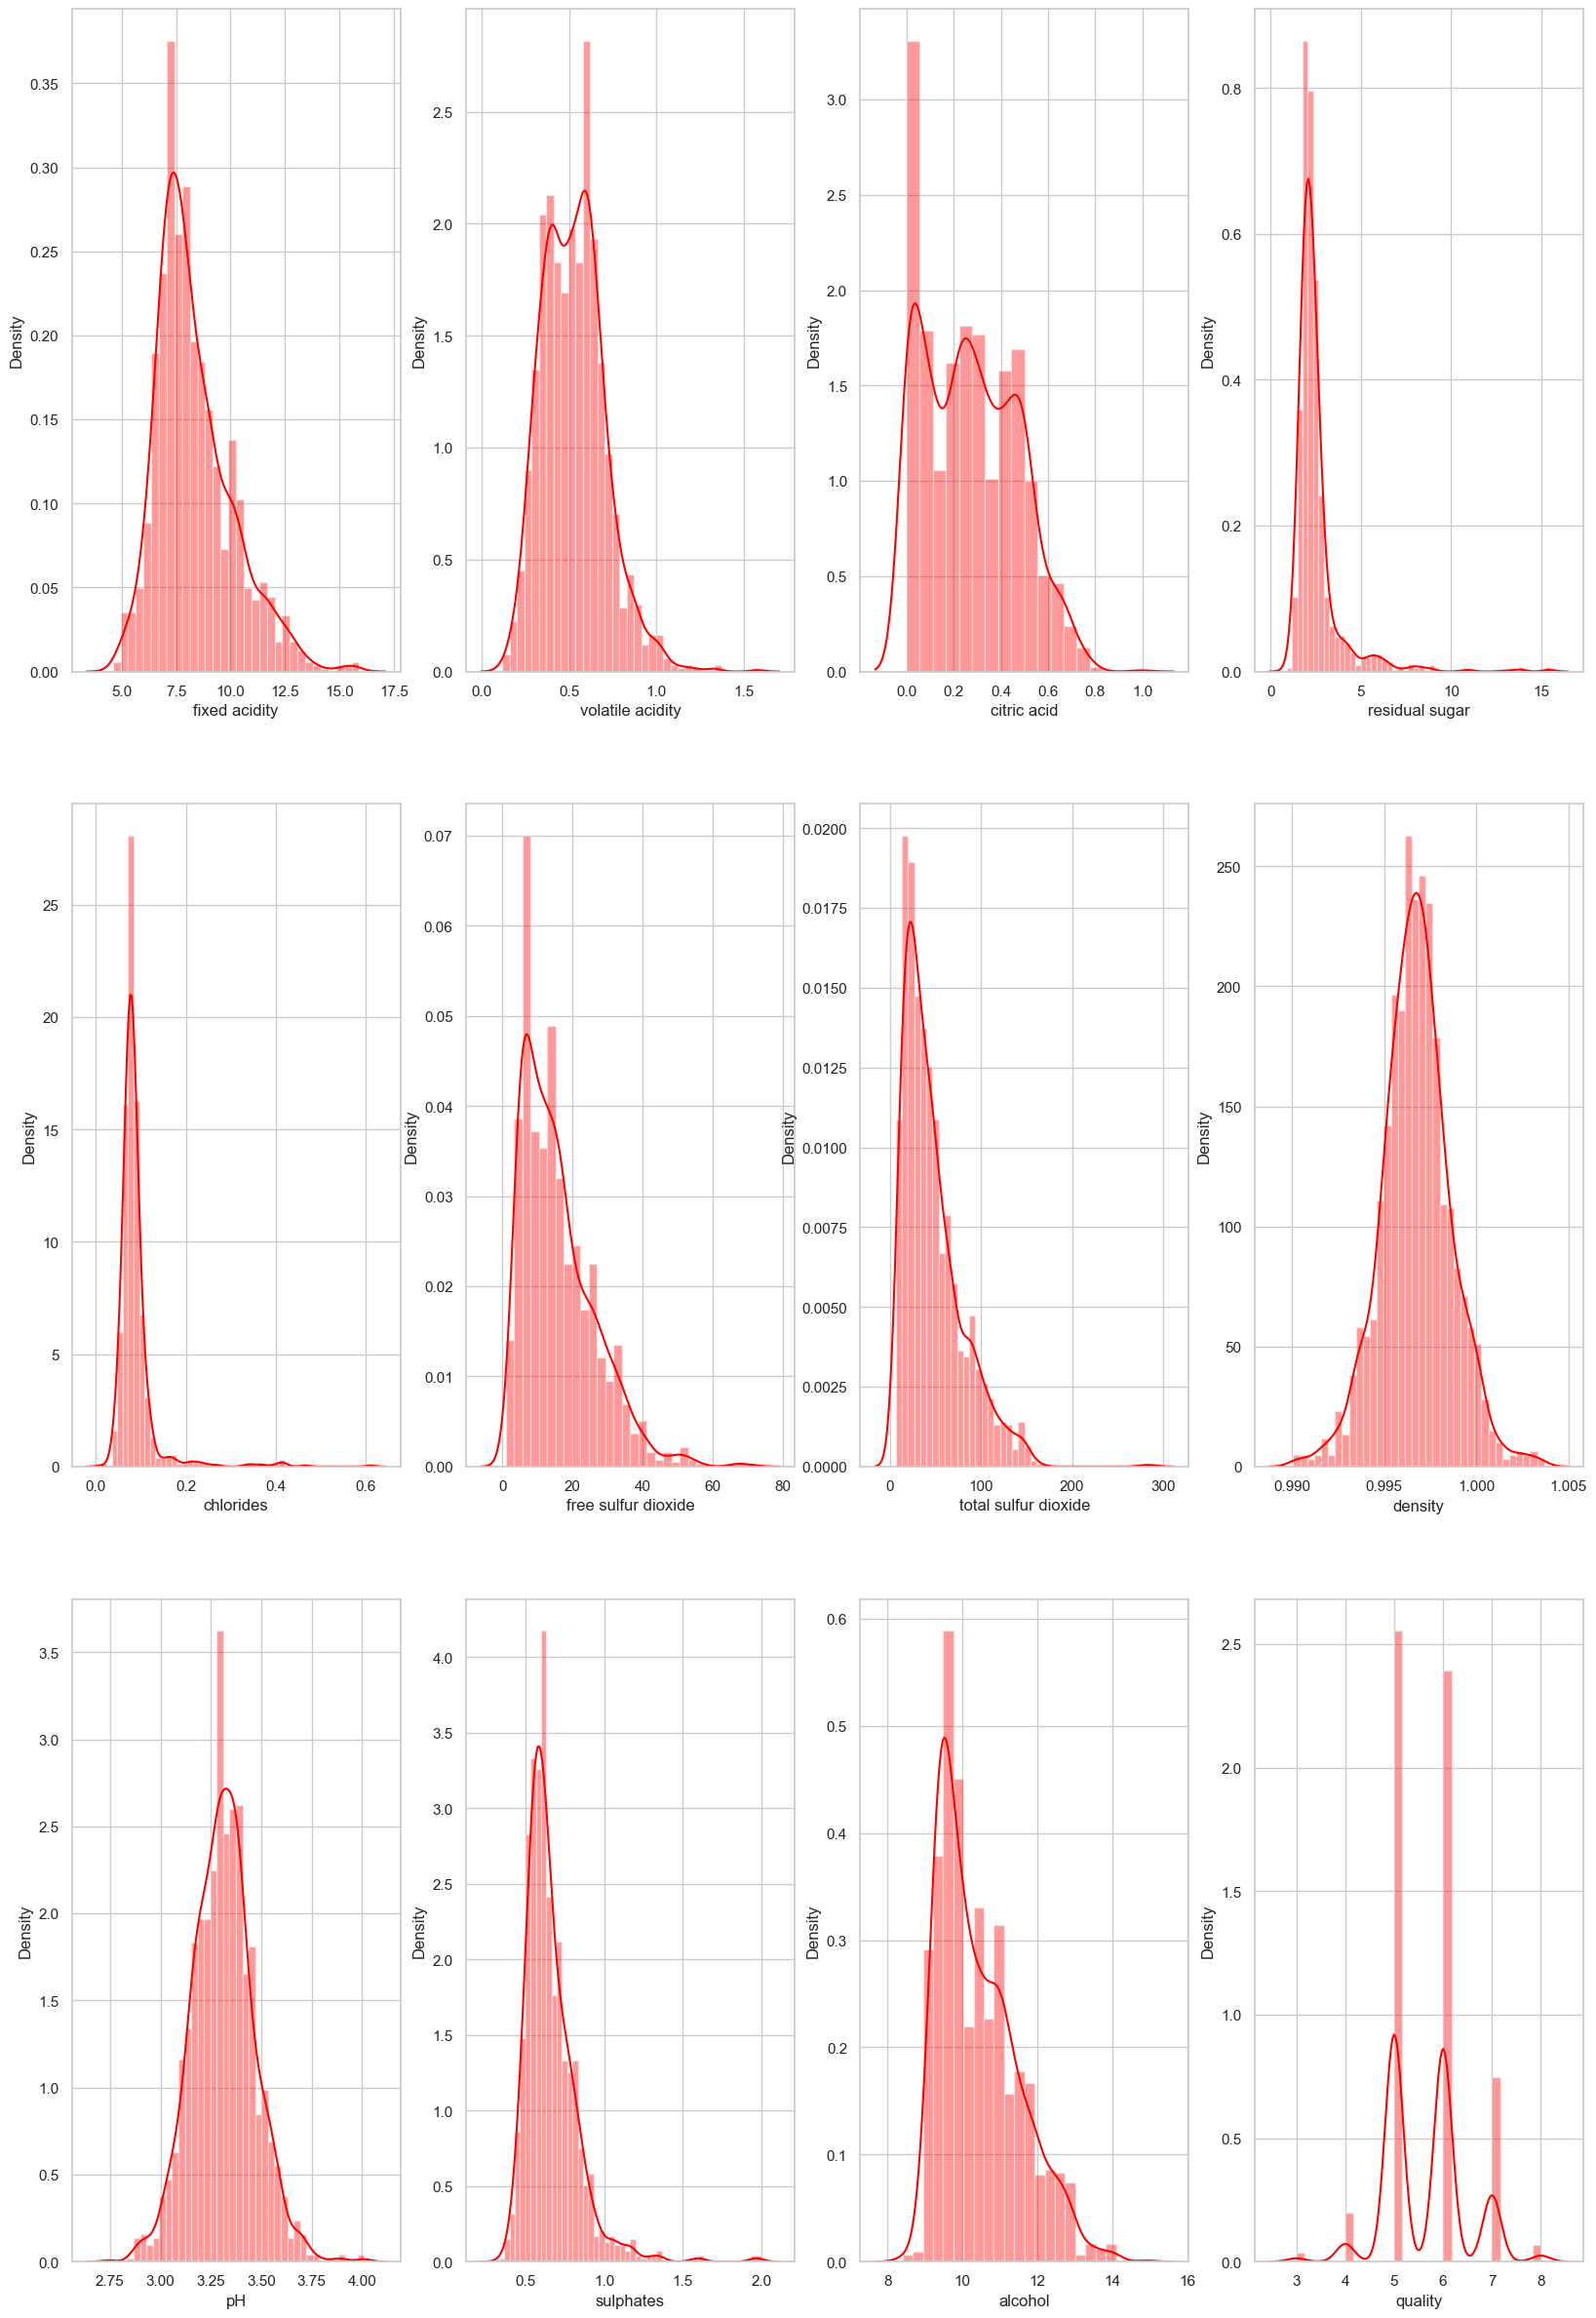

In [11]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(20,30))
k = 0
columns = list(wine_df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(wine_df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

**Observation:** We see that some of our columns are highly skewed towards right. These columns include Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide, and Sulphates. So we need to tranform it. Applying a log transfrom will solve the problem!

In [12]:
def log_transform(col):
    return np.log(col[0])

wine_df['residual sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free sulfur dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total sulfur dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)

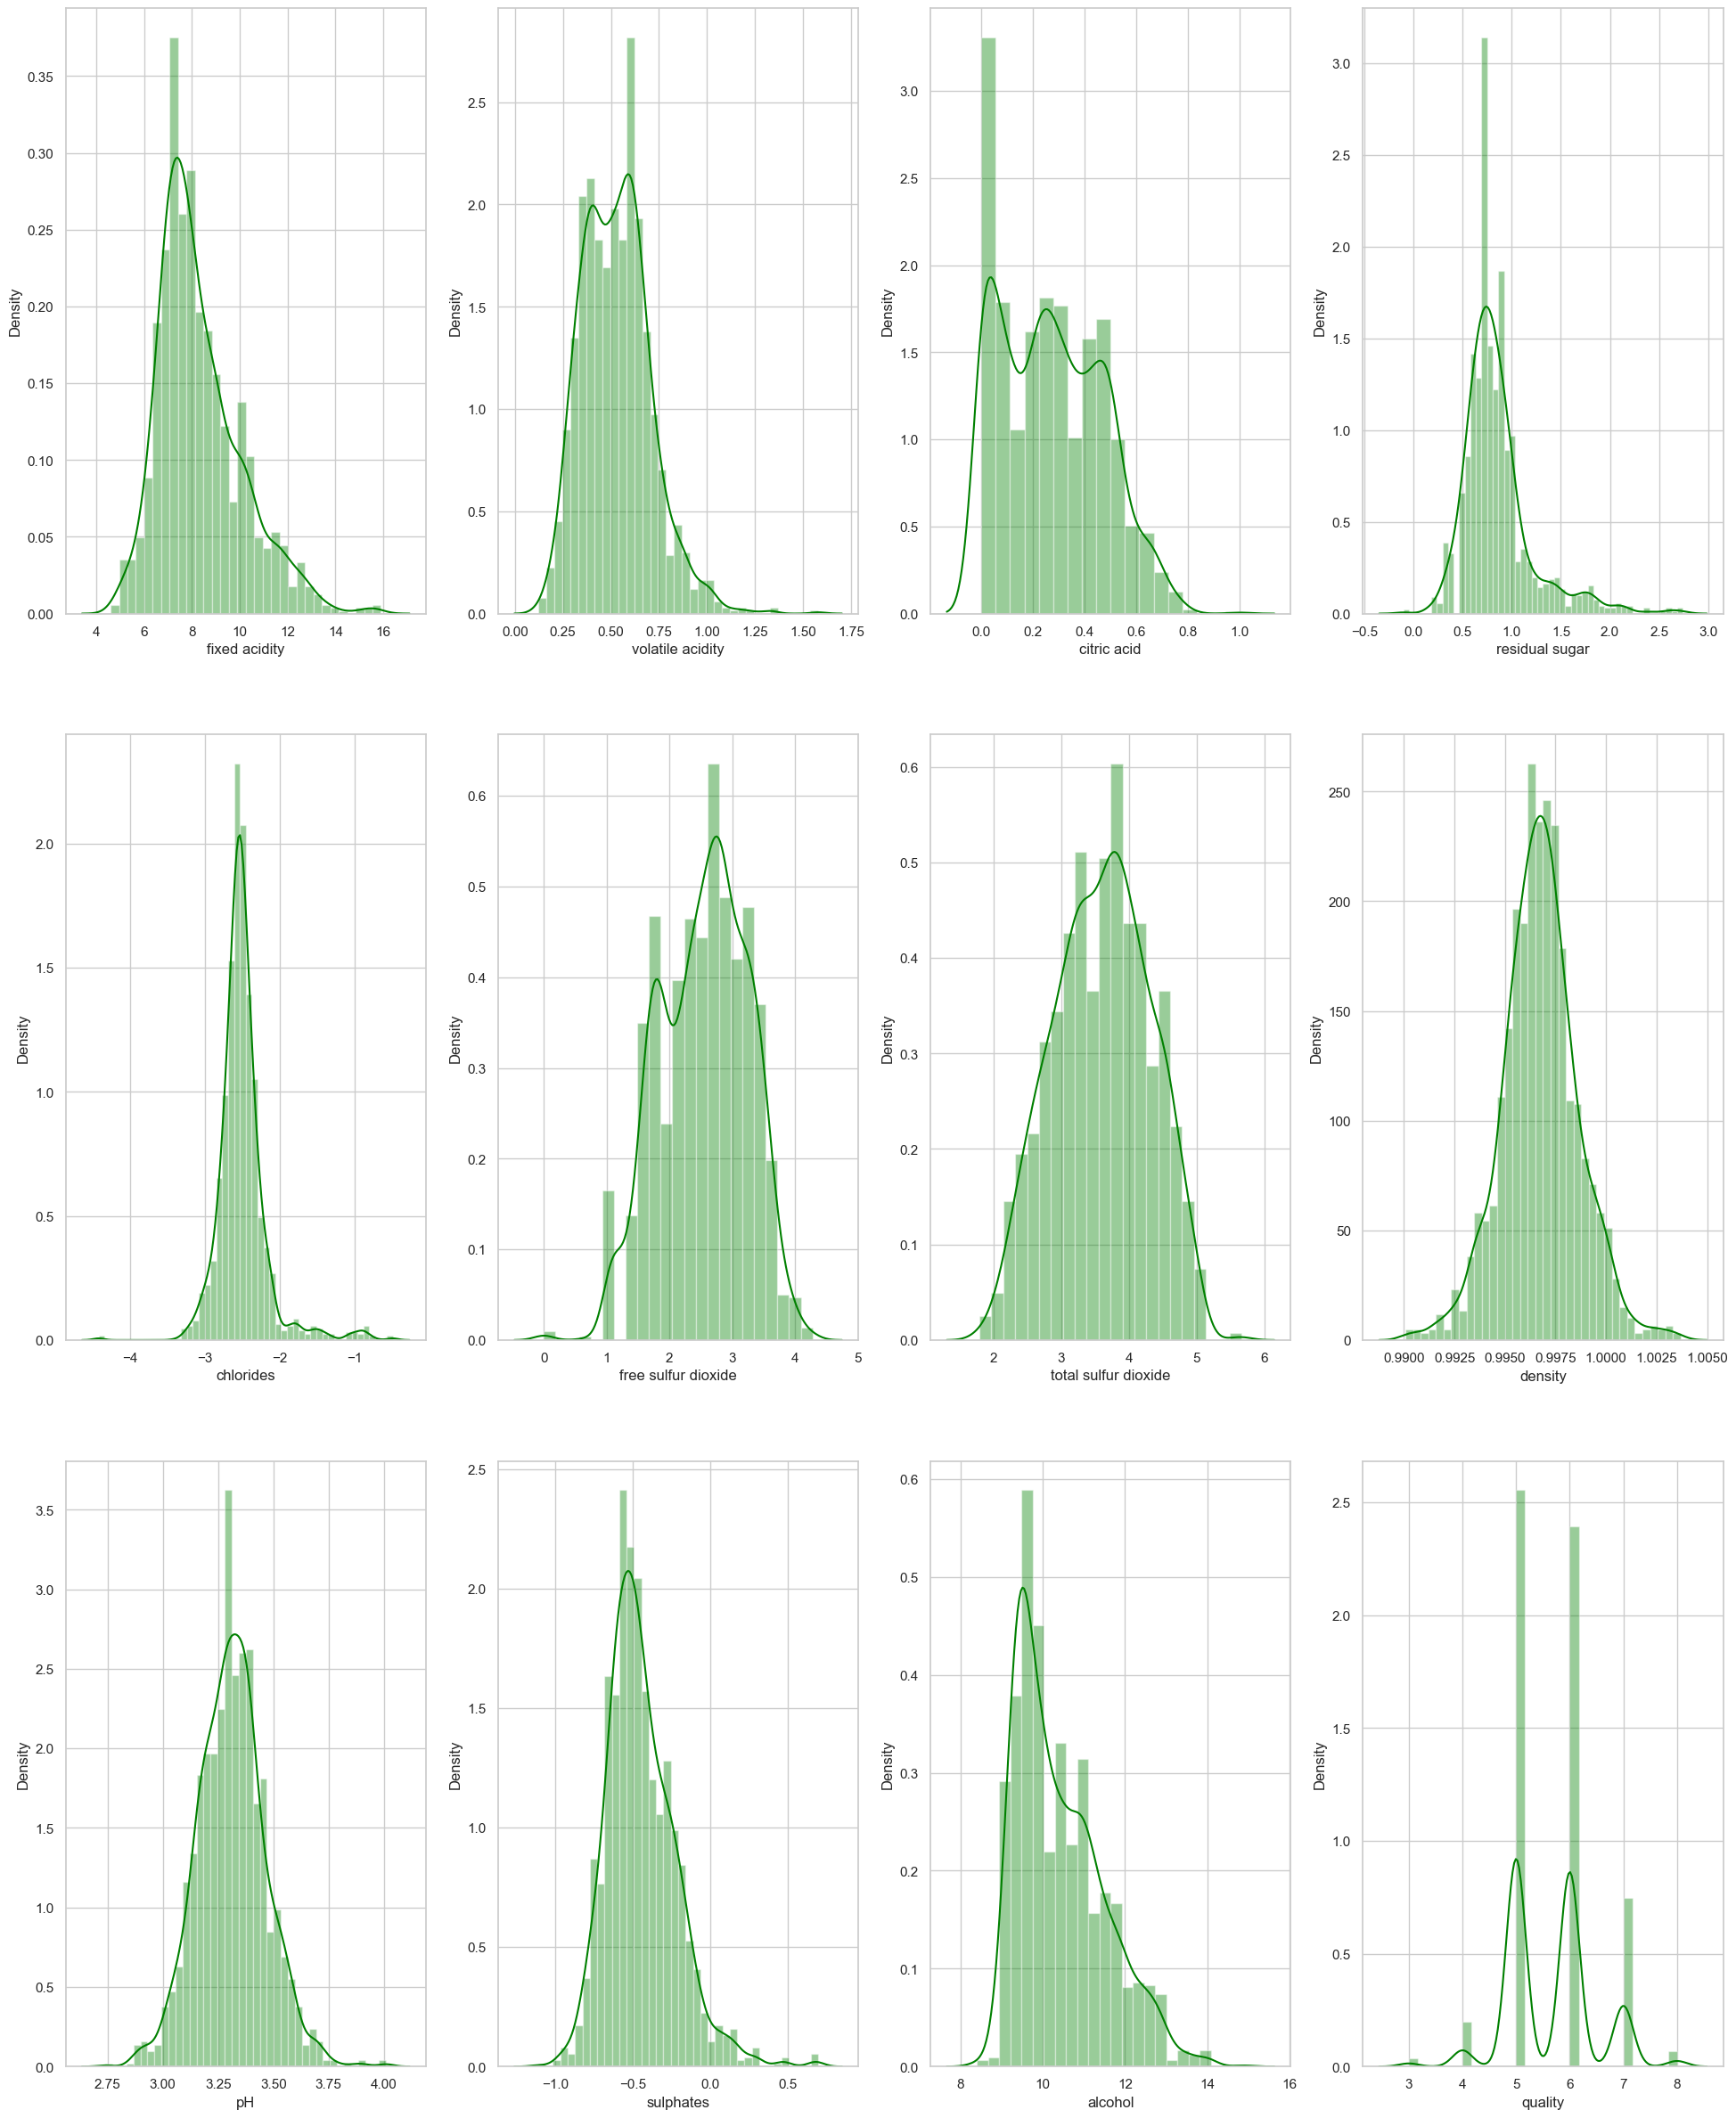

In [13]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(wine_df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(wine_df[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

Now the features are normally distributed. Now we can move forward.

In [14]:
wine_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

**Observation:** Although none of the columns show high correlation with the target colummn, we can say that Alcohol, Sulphates, citric acid, fixed acidity have the highest correlations.

## Split the data

In [15]:
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

In [16]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Bythis we can see that, data is imblanced. We need to balance the data by using sampling.

In [17]:
#!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X.fillna(0), y)

In [19]:
y.value_counts()

quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64

We can see that the count of all of our quality categories have been made equal!

In [20]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split

def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    return model.score(x_test, y_test) * 100
    #print("Accuracy:", model.score(x_test, y_test) * 100)
    
#     # cross-validation
#     score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(score)*100)

## Apply LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
LinearReg_acc=classify(model, X, y)
LinearReg_acc

50.489236790606654

## Apply SupportVectorMachine

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state = 1)
SVM_acc=classify(model, X, y)
SVM_acc

47.162426614481404

## Apply DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
DecTree_acc=classify(model, X, y)
DecTree_acc

79.06066536203522

## Apply RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
RanFor_acc=classify(model, X, y)
RanFor_acc


85.22504892367905

In [25]:
Accuracy = [LinearReg_acc, DecTree_acc,RanFor_acc,SVM_acc]
models = ['LogisticRegression', 'DecisionTreeClassifier' , 'RandomForestClassifier', 'Support Vector Machine']

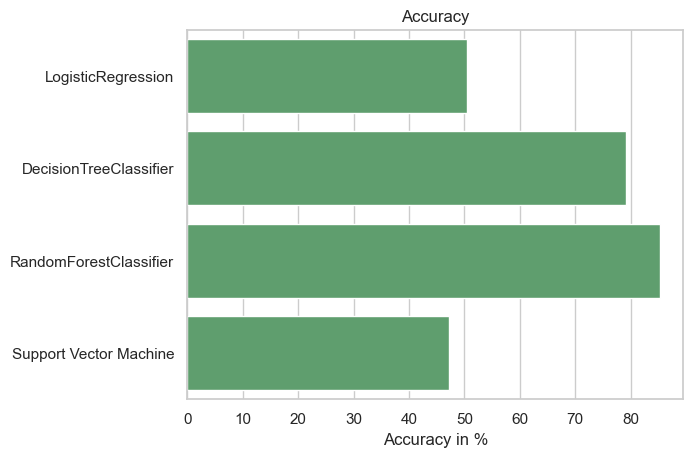

In [26]:
sns.barplot(x=Accuracy, y=models, color="g")
plt.xlabel('Accuracy in %')
plt.title('Accuracy')
plt.show()

`RandomForestClassifier` won the rece with 86%.

## Save RandomForestClassifier Model by using Pickel

In [27]:
from sklearn.ensemble import RandomForestClassifier
RanFor_model = RandomForestClassifier()
RanFor_acc=classify(RanFor_model, X, y)
RanFor_acc

85.61643835616438

In [28]:
import pickle

In [29]:

# save the model to disk
filename = 'finalRF_model.sav'
pickle.dump(RanFor_model, open(filename, 'wb'))

In [30]:
# Load the Model back from file
with open(filename, 'rb') as file:  
    RF_Model = pickle.load(file)

RF_Model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

## References

- https://www.kaggle.com/code/yasserh/wine-quality-prediction-comparing-top-ml-models
- https://www.kaggle.com/code/mohitgoyal522/wine-quality-data-analysis-and-prediction
- https://www.kaggle.com/code/nikunjmalpani/wine-quality-prediction-imbalanced-data
- https://medium.com/codersarts/wine-quality-prediction-with-machine-learning-2a92567ad2a
    

<center><h2> Happy Learning </h2></center>